# Backpropagation
Hier wollen wir nun Backpropagation selbst implementieren... 

In [6]:
#%matplotlib widget
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(42)

### Funktionen

In [7]:

def forward(inpX, w1, w2, b1, b2):
    """
    Perform a forward step of the network. For the transfer function in the hidden layer, use tanh.

    Parameters
    ----------
    inpX : data matrix
        input matrix, shaped as: samples x dimensions
    w1 : matrix
        weight matrix between input and hidden neurons
    w2 : matrix
        weight matrix between hidden and output neurons
    b1 : vector
        bias vector for the hidden neurons
    b2 : vector
        bias vector for the output neurons
    """

    u1 = np.dot(inpX, w1) - b1
    y1 = np.tanh(u1)
    return u1, y1, np.dot(y1, w2) - b2  # u1, y1, y2


def initialize_weights(inpDim, hiddenNeurons, outDim):
    """
    Initialize the weight matrix based on input Dimension, amount of hidden neurons and output dimension.
    The range for the initial weights is given by [-.5; .5].

    Parameters
    ----------
    inpDim : int
        Number of input neurons
    hiddenNeurons : int
        Number of hidden neurons
    outDim : int
        Number of output neurons
    weights : list
        List containing the weights and biases in the following order: [w1, w2, b1, b2]
    """

    w1 = np.random.rand(inpDim, hiddenNeurons) - np.full((inpDim, hiddenNeurons), 0.5)

    w2 = np.random.rand(hiddenNeurons, outDim) - np.full((hiddenNeurons, outDim), 0.5)

    b1 = np.random.rand(hiddenNeurons) - np.full(hiddenNeurons, 0.5)

    b2 = np.random.rand(outDim) - np.full(outDim, 0.5)

    return np.array([w1, w2, b1, b2])


def prop_error(T, y2, w2, transDiff_u1):
    """
    Calculation of the error of the network

    Parameters
    ----------
    T : float
        teaching signal of the current sample
    y2 : float
        output of the last neuron
    w2 : data matrix
        weight matrix between hidden and output layer
    transDiff_u1 : vector
        differential of the transfer function used on u1
    """

    d2 = T - y2
    d1 = np.multiply(np.dot(w2, d2), transDiff_u1)

    return d1, d2


def training(hiddenNeurons, lernRate, inpX, outT, epoch):
    """
    Train the neural network.

    Parameters
    ----------
    hiddenNeurons : int
        Number of hidden Neurons
    lernRate : float
        Lernrate \eta
    inpX : data matrix
        input data and shaped as: samples x dimensions
    outT : vector
        teaching signal: one dimensional vector
    epoch : int
        number of training epochs
    """

    global w1, w2, b1, b2

    error = np.array([])

    initWeights = initialize_weights(inpX.shape[1], hiddenNeurons, 1)
    w1 = initWeights[0]
    w2 = initWeights[1]
    b1 = initWeights[2]
    b2 = initWeights[3]

    for e in range(0, epoch):
        print("Running epoch " + str(e))
        # One Epoch: Apply samples in random order
        for x in np.random.permutation(inpX.shape[0]):
            # print("    Applying sample " + str(x) + ": " + str(inpX[x]) + " (T=" + str(outT[x]) + ")")

            inX = inpX[x]
            T = outT[x]

            u1, y1, y2 = forward(inX, w1, w2, b1, b2)

            fd = lambda x: 1 / (np.cosh(x) ** 2)
            d1, d2 = prop_error(T, y2, w2, fd(u1))

            w2_change = lernRate * np.outer(y1, d2)
            w2 = w2 + w2_change
            w1_change = lernRate * np.outer(inX, d1)
            w1 = w1 + w1_change

            b2 = b2 - np.dot(lernRate, d2)
            b1 = b1 - np.dot(lernRate, d1)

        # Store error
        E = 0
        for i in range(0, inpX.shape[0]):
            _, _, y2 = forward(inpX[i], w1, w2, b1, b2)
            E = E + np.abs(outT[i] - y2) ** 2

        error = np.append(error, E)

        print("Error is now " + str(E))

    return error


### Initialiserung der Parameter.
- X und Y entsprechen dem Datensatz
- Z ist das Lehrersignal

In [8]:
## Generate some sample data
def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2)) + np.cos(0.9 * (x - y))


X = np.linspace(-6, 6, 30)
Y = np.linspace(-6, 6, 30)
x, y = np.meshgrid(X, Y)
z = f(x, y)

############
## Initialize network parameter
hiddenNeuronen = 100
lernRate = 0.01
epochen = 1000


xData = x.ravel()
yData = y.ravel()
trainData = np.array(list(zip(xData, yData)))
teachData = z.flatten()

error = training(hiddenNeuronen, lernRate, trainData, teachData, epochen)

Running epoch 0
Error is now [668.70066669]
Running epoch 1
Error is now [275.42639489]
Running epoch 2
Error is now [267.25151652]
Running epoch 3


Error is now [251.59363589]
Running epoch 4
Error is now [591.59492239]
Running epoch 5
Error is now [343.84770489]
Running epoch 6
Error is now [335.93431545]
Running epoch 7


Error is now [207.1641282]
Running epoch 8
Error is now [224.98416082]
Running epoch 9
Error is now [349.52114398]
Running epoch 10
Error is now [220.23467597]
Running epoch 11


Error is now [620.08564173]
Running epoch 12
Error is now [249.24267681]
Running epoch 13
Error is now [252.32251571]
Running epoch 14
Error is now [226.62056521]
Running epoch 15


Error is now [178.26761496]
Running epoch 16
Error is now [268.15475131]
Running epoch 17
Error is now [201.79439997]
Running epoch 18
Error is now [285.60397591]
Running epoch 19


Error is now [277.7660477]
Running epoch 20
Error is now [187.10955458]
Running epoch 21
Error is now [374.97689308]
Running epoch 22
Error is now [320.48316648]
Running epoch 23


Error is now [191.03990591]
Running epoch 24
Error is now [288.69650564]
Running epoch 25
Error is now [204.31567933]
Running epoch 26
Error is now [253.92505711]
Running epoch 27


Error is now [193.97329593]
Running epoch 28
Error is now [195.70928249]
Running epoch 29
Error is now [277.13238331]
Running epoch 30
Error is now [226.60326969]
Running epoch 31


Error is now [216.12687923]
Running epoch 32
Error is now [191.34056272]
Running epoch 33
Error is now [229.97947159]
Running epoch 34
Error is now [195.82776622]
Running epoch 35


Error is now [156.81025034]
Running epoch 36
Error is now [253.55740947]
Running epoch 37
Error is now [174.38392976]
Running epoch 38
Error is now [171.22161136]
Running epoch 39


Error is now [468.68955271]
Running epoch 40
Error is now [166.33500805]
Running epoch 41
Error is now [269.92546123]
Running epoch 42
Error is now [151.1632598]
Running epoch 43


Error is now [127.70150479]
Running epoch 44
Error is now [128.15815488]
Running epoch 45
Error is now [213.2077079]
Running epoch 46
Error is now [208.03012447]
Running epoch 47


Error is now [122.33348523]
Running epoch 48
Error is now [120.37789748]
Running epoch 49
Error is now [139.44958857]
Running epoch 50
Error is now [157.7270292]
Running epoch 51


Error is now [172.71680588]
Running epoch 52
Error is now [134.71145415]
Running epoch 53
Error is now [118.10836306]
Running epoch 54
Error is now [128.98166257]
Running epoch 55


Error is now [321.69658675]
Running epoch 56
Error is now [133.87884291]
Running epoch 57
Error is now [193.48261056]
Running epoch 58
Error is now [160.99909399]
Running epoch 59


Error is now [151.61681758]
Running epoch 60
Error is now [145.58505163]
Running epoch 61
Error is now [164.90694079]
Running epoch 62
Error is now [253.20042744]
Running epoch 63


Error is now [113.31397503]
Running epoch 64
Error is now [125.74128555]
Running epoch 65
Error is now [134.90414538]
Running epoch 66
Error is now [129.12462977]
Running epoch 67


Error is now [96.77485318]
Running epoch 68
Error is now [117.64871394]
Running epoch 69
Error is now [156.39369585]
Running epoch 70
Error is now [108.55127393]
Running epoch 71


Error is now [177.2984655]
Running epoch 72
Error is now [135.07909526]
Running epoch 73
Error is now [183.8585824]
Running epoch 74
Error is now [120.43108292]
Running epoch 75


Error is now [94.6853686]
Running epoch 76
Error is now [105.69906262]
Running epoch 77
Error is now [87.2261904]
Running epoch 78
Error is now [80.18532118]
Running epoch 79


Error is now [121.63963284]
Running epoch 80
Error is now [94.18693303]
Running epoch 81
Error is now [77.93953942]
Running epoch 82
Error is now [81.37999916]
Running epoch 83


Error is now [81.11399143]
Running epoch 84
Error is now [70.90418255]
Running epoch 85
Error is now [97.39903944]
Running epoch 86
Error is now [70.58764306]
Running epoch 87


Error is now [125.22778257]
Running epoch 88
Error is now [87.10607499]
Running epoch 89
Error is now [108.74177274]
Running epoch 90
Error is now [77.00068591]
Running epoch 91


Error is now [130.68483417]
Running epoch 92
Error is now [62.95669292]
Running epoch 93
Error is now [77.82249602]
Running epoch 94
Error is now [57.5576436]
Running epoch 95


Error is now [120.09514102]
Running epoch 96
Error is now [137.39379029]
Running epoch 97
Error is now [66.0282738]
Running epoch 98
Error is now [54.9651976]
Running epoch 99


Error is now [63.93340349]
Running epoch 100
Error is now [135.33099696]
Running epoch 101
Error is now [55.71244223]
Running epoch 102
Error is now [62.06232568]
Running epoch 103


Error is now [49.44229214]
Running epoch 104
Error is now [63.21811937]
Running epoch 105
Error is now [61.01104799]
Running epoch 106
Error is now [87.78129809]
Running epoch 107


Error is now [65.20690697]
Running epoch 108
Error is now [84.43437627]
Running epoch 109
Error is now [81.64977248]
Running epoch 110
Error is now [102.12289174]
Running epoch 111


Error is now [114.76523037]
Running epoch 112
Error is now [69.3402894]
Running epoch 113
Error is now [58.53775895]
Running epoch 114
Error is now [57.86578085]
Running epoch 115


Error is now [74.8555941]
Running epoch 116
Error is now [55.53463116]
Running epoch 117
Error is now [81.47637337]
Running epoch 118
Error is now [67.86331931]
Running epoch 119


Error is now [87.25309344]
Running epoch 120
Error is now [61.99627595]
Running epoch 121
Error is now [39.75793068]
Running epoch 122
Error is now [49.40360866]
Running epoch 123


Error is now [76.53821199]
Running epoch 124
Error is now [47.84132948]
Running epoch 125
Error is now [54.38593083]
Running epoch 126
Error is now [62.17535825]
Running epoch 127


Error is now [92.58653608]
Running epoch 128
Error is now [61.71631052]
Running epoch 129
Error is now [52.19506871]
Running epoch 130
Error is now [49.23449948]
Running epoch 131


Error is now [113.01857086]
Running epoch 132
Error is now [35.48814781]
Running epoch 133
Error is now [90.38625663]
Running epoch 134
Error is now [59.02234688]
Running epoch 135


Error is now [70.4921738]
Running epoch 136
Error is now [44.2251678]
Running epoch 137
Error is now [55.98972602]
Running epoch 138
Error is now [70.46349039]
Running epoch 139


Error is now [36.81143101]
Running epoch 140
Error is now [56.28492714]
Running epoch 141
Error is now [37.6394368]
Running epoch 142
Error is now [38.57522593]
Running epoch 143


Error is now [35.60161635]
Running epoch 144
Error is now [36.51561084]
Running epoch 145
Error is now [58.96147837]
Running epoch 146
Error is now [81.98574118]
Running epoch 147


Error is now [45.45232791]
Running epoch 148
Error is now [39.64258284]
Running epoch 149
Error is now [53.53165469]
Running epoch 150
Error is now [46.16989352]
Running epoch 151


Error is now [33.22322601]
Running epoch 152
Error is now [36.19512483]
Running epoch 153
Error is now [26.34221954]
Running epoch 154
Error is now [86.08936535]
Running epoch 155


Error is now [35.60028705]
Running epoch 156
Error is now [35.50149214]
Running epoch 157
Error is now [37.51707985]
Running epoch 158
Error is now [53.23701083]
Running epoch 159


Error is now [31.38139251]
Running epoch 160
Error is now [47.31403784]
Running epoch 161
Error is now [41.08946882]
Running epoch 162
Error is now [53.43681412]
Running epoch 163


Error is now [24.87019706]
Running epoch 164
Error is now [40.25341548]
Running epoch 165
Error is now [35.47362117]
Running epoch 166
Error is now [31.33160322]
Running epoch 167


Error is now [35.14906842]
Running epoch 168
Error is now [28.19057432]
Running epoch 169
Error is now [44.85896213]
Running epoch 170
Error is now [28.19585718]
Running epoch 171


Error is now [26.34553836]
Running epoch 172
Error is now [28.58152516]
Running epoch 173
Error is now [21.62080579]
Running epoch 174
Error is now [26.2986773]
Running epoch 175


Error is now [35.73276512]
Running epoch 176
Error is now [46.25939069]
Running epoch 177
Error is now [30.34306976]
Running epoch 178
Error is now [34.25232825]
Running epoch 179


Error is now [22.17053737]
Running epoch 180
Error is now [43.04031951]
Running epoch 181
Error is now [29.01997428]
Running epoch 182
Error is now [23.47308474]
Running epoch 183


Error is now [27.37664155]
Running epoch 184
Error is now [33.57319819]
Running epoch 185
Error is now [26.3732747]
Running epoch 186
Error is now [24.39424572]
Running epoch 187


Error is now [25.5995493]
Running epoch 188
Error is now [30.28406836]
Running epoch 189
Error is now [28.98643772]
Running epoch 190
Error is now [28.36409777]
Running epoch 191


Error is now [25.71488793]
Running epoch 192
Error is now [26.32105786]
Running epoch 193
Error is now [40.85494549]
Running epoch 194
Error is now [19.03456816]
Running epoch 195


Error is now [18.50830091]
Running epoch 196
Error is now [25.55370063]
Running epoch 197
Error is now [20.89900767]
Running epoch 198
Error is now [21.83279943]
Running epoch 199


Error is now [30.28532746]
Running epoch 200
Error is now [24.09317161]
Running epoch 201
Error is now [34.19311688]
Running epoch 202
Error is now [21.38158417]
Running epoch 203


Error is now [31.90159135]
Running epoch 204
Error is now [45.75304524]
Running epoch 205
Error is now [48.98525392]
Running epoch 206
Error is now [18.54605816]
Running epoch 207


Error is now [17.28995569]
Running epoch 208
Error is now [15.49680399]
Running epoch 209
Error is now [20.28950711]
Running epoch 210
Error is now [17.68004045]
Running epoch 211


Error is now [24.64248689]
Running epoch 212
Error is now [19.82489291]
Running epoch 213
Error is now [44.848103]
Running epoch 214
Error is now [20.10606638]
Running epoch 215


Error is now [17.12354847]
Running epoch 216
Error is now [32.86608636]
Running epoch 217
Error is now [30.76128715]
Running epoch 218
Error is now [15.67835486]
Running epoch 219


Error is now [37.73270336]
Running epoch 220
Error is now [23.99746247]
Running epoch 221
Error is now [16.45332038]
Running epoch 222
Error is now [17.93214549]
Running epoch 223


Error is now [16.68741006]
Running epoch 224
Error is now [67.16590162]
Running epoch 225
Error is now [17.41985873]
Running epoch 226
Error is now [22.36444737]
Running epoch 227


Error is now [16.92896418]
Running epoch 228
Error is now [19.86464828]
Running epoch 229
Error is now [15.31642602]
Running epoch 230
Error is now [20.01675153]
Running epoch 231


Error is now [16.03587435]
Running epoch 232
Error is now [15.95597562]
Running epoch 233
Error is now [25.820879]
Running epoch 234
Error is now [19.34247725]
Running epoch 235


Error is now [16.16763214]
Running epoch 236
Error is now [15.06057419]
Running epoch 237
Error is now [17.48697947]
Running epoch 238
Error is now [22.19766155]
Running epoch 239


Error is now [14.41689178]
Running epoch 240
Error is now [15.51345833]
Running epoch 241
Error is now [11.39330189]
Running epoch 242
Error is now [12.68095515]
Running epoch 243


Error is now [13.4827128]
Running epoch 244
Error is now [27.45957054]
Running epoch 245
Error is now [14.53674119]
Running epoch 246
Error is now [11.01414717]
Running epoch 247


Error is now [20.32792409]
Running epoch 248
Error is now [21.34276762]
Running epoch 249
Error is now [20.92542484]
Running epoch 250
Error is now [23.30767916]
Running epoch 251


Error is now [19.87715984]
Running epoch 252
Error is now [21.65996197]
Running epoch 253
Error is now [11.36832122]
Running epoch 254
Error is now [17.37192004]
Running epoch 255


Error is now [28.87992906]
Running epoch 256
Error is now [16.29318167]
Running epoch 257
Error is now [13.75724]
Running epoch 258
Error is now [18.55009677]
Running epoch 259


Error is now [12.25902068]
Running epoch 260
Error is now [12.47263396]
Running epoch 261
Error is now [15.15532483]
Running epoch 262
Error is now [14.61740382]
Running epoch 263


Error is now [16.68818196]
Running epoch 264
Error is now [18.51642513]
Running epoch 265
Error is now [18.21058595]
Running epoch 266
Error is now [15.75676007]
Running epoch 267


Error is now [17.44875809]
Running epoch 268
Error is now [13.57626749]
Running epoch 269
Error is now [10.2070128]
Running epoch 270
Error is now [18.43110941]
Running epoch 271


Error is now [13.27166023]
Running epoch 272
Error is now [18.6620344]
Running epoch 273
Error is now [15.58322492]
Running epoch 274
Error is now [8.97762488]
Running epoch 275


Error is now [12.01577724]
Running epoch 276
Error is now [11.33242691]
Running epoch 277
Error is now [16.42985826]
Running epoch 278
Error is now [14.86637166]
Running epoch 279


Error is now [9.55012812]
Running epoch 280
Error is now [9.87511729]
Running epoch 281
Error is now [13.39625886]
Running epoch 282
Error is now [14.19948906]
Running epoch 283


Error is now [16.69066773]
Running epoch 284
Error is now [10.23297154]
Running epoch 285
Error is now [11.53273888]
Running epoch 286
Error is now [11.45957556]
Running epoch 287


Error is now [12.01255939]
Running epoch 288
Error is now [13.68575339]
Running epoch 289
Error is now [15.45861064]
Running epoch 290
Error is now [8.3131224]
Running epoch 291


Error is now [11.84990096]
Running epoch 292
Error is now [11.0503584]
Running epoch 293
Error is now [13.31157435]
Running epoch 294
Error is now [8.8240139]
Running epoch 295


Error is now [13.74295362]
Running epoch 296
Error is now [19.84472551]
Running epoch 297
Error is now [10.36574566]
Running epoch 298
Error is now [9.01142033]
Running epoch 299


Error is now [19.11003503]
Running epoch 300
Error is now [11.56162887]
Running epoch 301
Error is now [10.86222475]
Running epoch 302
Error is now [9.85077098]
Running epoch 303


Error is now [8.42840157]
Running epoch 304
Error is now [13.05862742]
Running epoch 305
Error is now [14.26319936]
Running epoch 306
Error is now [11.04904181]
Running epoch 307


Error is now [10.92239489]
Running epoch 308
Error is now [7.40311573]
Running epoch 309
Error is now [7.9816172]
Running epoch 310
Error is now [7.69715821]
Running epoch 311


Error is now [13.80524356]
Running epoch 312
Error is now [7.45242143]
Running epoch 313
Error is now [6.89472075]
Running epoch 314
Error is now [9.47081194]
Running epoch 315


Error is now [9.37405247]
Running epoch 316
Error is now [10.2834366]
Running epoch 317
Error is now [7.65628058]
Running epoch 318
Error is now [8.74557565]
Running epoch 319


Error is now [16.94026463]
Running epoch 320
Error is now [12.02893338]
Running epoch 321
Error is now [9.17723256]
Running epoch 322
Error is now [16.67005964]
Running epoch 323


Error is now [10.47951153]
Running epoch 324
Error is now [8.99530544]
Running epoch 325
Error is now [12.34347283]
Running epoch 326
Error is now [8.25434169]
Running epoch 327


Error is now [6.22052806]
Running epoch 328
Error is now [8.63983408]
Running epoch 329
Error is now [14.66660017]
Running epoch 330
Error is now [7.78212559]
Running epoch 331


Error is now [6.86289887]
Running epoch 332
Error is now [6.93111207]
Running epoch 333
Error is now [8.20289627]
Running epoch 334
Error is now [7.67368204]
Running epoch 335


Error is now [7.4226012]
Running epoch 336
Error is now [7.60499272]
Running epoch 337
Error is now [9.48746333]
Running epoch 338
Error is now [6.4915083]
Running epoch 339


Error is now [10.94041765]
Running epoch 340
Error is now [23.95699967]
Running epoch 341
Error is now [6.53479183]
Running epoch 342
Error is now [7.15328847]
Running epoch 343


Error is now [9.80099048]
Running epoch 344
Error is now [9.05988001]
Running epoch 345
Error is now [8.8398293]
Running epoch 346
Error is now [15.34561731]
Running epoch 347


Error is now [8.41556771]
Running epoch 348
Error is now [9.87062071]
Running epoch 349
Error is now [7.07064245]
Running epoch 350
Error is now [10.93609939]
Running epoch 351


Error is now [9.72176832]
Running epoch 352
Error is now [15.12630177]
Running epoch 353
Error is now [10.07220647]
Running epoch 354
Error is now [7.44403689]
Running epoch 355


Error is now [7.98736385]
Running epoch 356
Error is now [10.27252806]
Running epoch 357
Error is now [10.30149395]
Running epoch 358
Error is now [21.95206988]
Running epoch 359


Error is now [10.77794792]
Running epoch 360
Error is now [9.67408468]
Running epoch 361
Error is now [8.16051023]
Running epoch 362
Error is now [6.5067541]
Running epoch 363


Error is now [6.86313407]
Running epoch 364
Error is now [7.95791858]
Running epoch 365
Error is now [10.35115074]
Running epoch 366
Error is now [20.55858247]
Running epoch 367


Error is now [6.70225781]
Running epoch 368
Error is now [9.40384702]
Running epoch 369
Error is now [10.90656945]
Running epoch 370
Error is now [6.35883319]
Running epoch 371


Error is now [30.05678436]
Running epoch 372
Error is now [6.57362074]
Running epoch 373
Error is now [12.27538]
Running epoch 374
Error is now [8.31298952]
Running epoch 375


Error is now [6.73015077]
Running epoch 376
Error is now [6.68904112]
Running epoch 377
Error is now [9.04408662]
Running epoch 378
Error is now [7.41275695]
Running epoch 379


Error is now [6.02748876]
Running epoch 380
Error is now [13.07191081]
Running epoch 381
Error is now [9.01848912]
Running epoch 382
Error is now [8.23410429]
Running epoch 383


Error is now [8.39988591]
Running epoch 384
Error is now [7.15139661]
Running epoch 385
Error is now [12.82078633]
Running epoch 386
Error is now [5.68668034]
Running epoch 387


Error is now [10.40611748]
Running epoch 388
Error is now [10.3653087]
Running epoch 389
Error is now [8.27522957]
Running epoch 390
Error is now [7.65027035]
Running epoch 391


Error is now [7.80756949]
Running epoch 392
Error is now [12.51632074]
Running epoch 393
Error is now [9.20284571]
Running epoch 394
Error is now [18.48891736]
Running epoch 395


Error is now [11.28348632]
Running epoch 396
Error is now [7.67695472]
Running epoch 397
Error is now [7.99247498]
Running epoch 398
Error is now [7.72632403]
Running epoch 399


Error is now [10.21686674]
Running epoch 400
Error is now [7.71315363]
Running epoch 401
Error is now [9.46558745]
Running epoch 402
Error is now [5.46984329]
Running epoch 403
Error is now [8.94758422]
Running epoch 404


Error is now [12.6631504]
Running epoch 405
Error is now [12.91816195]
Running epoch 406
Error is now [7.91768969]
Running epoch 407
Error is now [7.08071222]
Running epoch 408


Error is now [10.26878131]
Running epoch 409
Error is now [5.93418648]
Running epoch 410
Error is now [7.5591858]
Running epoch 411
Error is now [6.99716107]
Running epoch 412


Error is now [8.65483288]
Running epoch 413
Error is now [7.15536644]
Running epoch 414
Error is now [7.39126835]
Running epoch 415
Error is now [6.25459471]
Running epoch 416


Error is now [6.4065482]
Running epoch 417
Error is now [7.22917237]
Running epoch 418
Error is now [6.79939774]
Running epoch 419
Error is now [6.02872519]
Running epoch 420


Error is now [6.23816029]
Running epoch 421
Error is now [7.81354153]
Running epoch 422
Error is now [10.58687064]
Running epoch 423
Error is now [6.3876168]
Running epoch 424


Error is now [9.24297984]
Running epoch 425
Error is now [5.67288287]
Running epoch 426
Error is now [8.12152735]
Running epoch 427
Error is now [5.65361398]
Running epoch 428


Error is now [11.47612218]
Running epoch 429
Error is now [5.73310983]
Running epoch 430
Error is now [7.65666943]
Running epoch 431
Error is now [10.94156461]
Running epoch 432


Error is now [5.55033278]
Running epoch 433
Error is now [7.86426703]
Running epoch 434
Error is now [7.7672334]
Running epoch 435
Error is now [7.14541961]
Running epoch 436


Error is now [5.80620069]
Running epoch 437
Error is now [6.06114265]
Running epoch 438
Error is now [5.812097]
Running epoch 439
Error is now [5.64349036]
Running epoch 440


Error is now [9.8873153]
Running epoch 441
Error is now [5.11197675]
Running epoch 442
Error is now [11.63506279]
Running epoch 443
Error is now [6.01547097]
Running epoch 444


Error is now [7.78441574]
Running epoch 445
Error is now [13.63689971]
Running epoch 446
Error is now [6.20407469]
Running epoch 447
Error is now [5.51735934]
Running epoch 448


Error is now [6.0670506]
Running epoch 449
Error is now [8.62590311]
Running epoch 450
Error is now [8.88790448]
Running epoch 451
Error is now [5.67938526]
Running epoch 452


Error is now [4.74308193]
Running epoch 453
Error is now [6.39824375]
Running epoch 454
Error is now [16.64908306]
Running epoch 455
Error is now [7.74412349]
Running epoch 456
Error is now [7.51340137]
Running epoch 457


Error is now [14.66304919]
Running epoch 458
Error is now [6.25950202]
Running epoch 459
Error is now [6.11759036]
Running epoch 460
Error is now [9.49745017]
Running epoch 461
Error is now [4.97331683]
Running epoch 462


Error is now [11.43151168]
Running epoch 463
Error is now [6.52152347]
Running epoch 464
Error is now [6.19735712]
Running epoch 465
Error is now [9.3404064]
Running epoch 466


Error is now [7.38800284]
Running epoch 467
Error is now [9.66095443]
Running epoch 468
Error is now [8.38144486]
Running epoch 469
Error is now [5.39244082]
Running epoch 470


Error is now [9.74746581]
Running epoch 471
Error is now [7.93072347]
Running epoch 472
Error is now [4.72639184]
Running epoch 473
Error is now [8.39131058]
Running epoch 474


Error is now [12.54968318]
Running epoch 475
Error is now [8.87097973]
Running epoch 476
Error is now [8.99245571]
Running epoch 477
Error is now [5.0425547]
Running epoch 478


Error is now [4.89782902]
Running epoch 479
Error is now [8.45522164]
Running epoch 480
Error is now [8.26762516]
Running epoch 481
Error is now [6.71590418]
Running epoch 482


Error is now [7.62030986]
Running epoch 483
Error is now [4.79689354]
Running epoch 484
Error is now [6.70184974]
Running epoch 485
Error is now [8.88655611]
Running epoch 486


Error is now [5.42928195]
Running epoch 487
Error is now [8.0721591]
Running epoch 488
Error is now [5.43158612]
Running epoch 489
Error is now [6.1371111]
Running epoch 490


Error is now [8.50073316]
Running epoch 491
Error is now [4.97729331]
Running epoch 492
Error is now [5.67000909]
Running epoch 493
Error is now [5.77109438]
Running epoch 494


Error is now [5.91803897]
Running epoch 495
Error is now [5.3565989]
Running epoch 496
Error is now [5.76423956]
Running epoch 497
Error is now [5.44017227]
Running epoch 498


Error is now [5.63583934]
Running epoch 499
Error is now [6.70644849]
Running epoch 500
Error is now [5.74617866]
Running epoch 501
Error is now [5.24362132]
Running epoch 502


Error is now [5.37977841]
Running epoch 503
Error is now [5.03103195]
Running epoch 504
Error is now [8.05367202]
Running epoch 505
Error is now [5.9069418]
Running epoch 506


Error is now [18.35401183]
Running epoch 507
Error is now [7.05342555]
Running epoch 508
Error is now [10.33256997]
Running epoch 509
Error is now [10.93108383]
Running epoch 510


Error is now [4.6422765]
Running epoch 511
Error is now [5.25071692]
Running epoch 512
Error is now [6.18708085]
Running epoch 513
Error is now [8.79584701]
Running epoch 514


Error is now [4.91350675]
Running epoch 515
Error is now [8.99525409]
Running epoch 516
Error is now [4.73418627]
Running epoch 517
Error is now [8.31767958]
Running epoch 518


Error is now [8.30397808]
Running epoch 519
Error is now [9.88881822]
Running epoch 520
Error is now [8.92154182]
Running epoch 521
Error is now [9.05995309]
Running epoch 522


Error is now [5.5284046]
Running epoch 523
Error is now [4.87004484]
Running epoch 524
Error is now [7.89913768]
Running epoch 525
Error is now [9.83048034]
Running epoch 526


Error is now [5.31751539]
Running epoch 527
Error is now [7.31932918]
Running epoch 528
Error is now [9.54377462]
Running epoch 529
Error is now [6.31190802]
Running epoch 530


Error is now [8.34520694]
Running epoch 531
Error is now [5.17768019]
Running epoch 532
Error is now [5.85745027]
Running epoch 533
Error is now [19.49060153]
Running epoch 534


Error is now [11.07447919]
Running epoch 535
Error is now [4.91250641]
Running epoch 536
Error is now [7.49581088]
Running epoch 537
Error is now [5.99075126]
Running epoch 538


Error is now [9.6850829]
Running epoch 539
Error is now [10.22983868]
Running epoch 540
Error is now [8.51956806]
Running epoch 541
Error is now [8.29997521]
Running epoch 542
Error is now [7.1384908]
Running epoch 543


Error is now [8.0607957]
Running epoch 544
Error is now [6.55084801]
Running epoch 545
Error is now [6.81626208]
Running epoch 546
Error is now [13.82916377]
Running epoch 547


Error is now [5.3205194]
Running epoch 548
Error is now [10.85546788]
Running epoch 549
Error is now [7.06470466]
Running epoch 550
Error is now [5.74056488]
Running epoch 551


Error is now [7.60660928]
Running epoch 552
Error is now [6.64194379]
Running epoch 553
Error is now [5.31860223]
Running epoch 554
Error is now [4.06188446]
Running epoch 555


Error is now [6.00165466]
Running epoch 556
Error is now [11.9045752]
Running epoch 557
Error is now [8.7676611]
Running epoch 558
Error is now [5.37006201]
Running epoch 559


Error is now [10.21964633]
Running epoch 560
Error is now [7.44288394]
Running epoch 561
Error is now [4.94042627]
Running epoch 562
Error is now [5.11966571]
Running epoch 563


Error is now [10.9311566]
Running epoch 564
Error is now [5.91838425]
Running epoch 565
Error is now [4.46251381]
Running epoch 566
Error is now [5.05910167]
Running epoch 567


Error is now [5.72268044]
Running epoch 568
Error is now [9.43554351]
Running epoch 569
Error is now [7.77803078]
Running epoch 570
Error is now [5.66644896]
Running epoch 571


Error is now [11.00636724]
Running epoch 572
Error is now [12.07295314]
Running epoch 573
Error is now [5.56735448]
Running epoch 574
Error is now [10.58093306]
Running epoch 575


Error is now [7.96359006]
Running epoch 576
Error is now [11.13788171]
Running epoch 577
Error is now [5.09783714]
Running epoch 578
Error is now [7.48816608]
Running epoch 579


Error is now [4.46491942]
Running epoch 580
Error is now [7.57621084]
Running epoch 581
Error is now [4.73184949]
Running epoch 582
Error is now [26.14560613]
Running epoch 583


Error is now [6.18479398]
Running epoch 584
Error is now [5.35592711]
Running epoch 585
Error is now [5.04864468]
Running epoch 586
Error is now [7.37152631]
Running epoch 587


Error is now [4.64154698]
Running epoch 588
Error is now [7.42871624]
Running epoch 589
Error is now [15.97864179]
Running epoch 590
Error is now [6.38622939]
Running epoch 591


Error is now [26.92546779]
Running epoch 592
Error is now [7.24939596]
Running epoch 593
Error is now [4.52634278]
Running epoch 594
Error is now [4.86425455]
Running epoch 595


Error is now [5.83745962]
Running epoch 596
Error is now [5.76571385]
Running epoch 597
Error is now [7.2547341]
Running epoch 598
Error is now [5.09538656]
Running epoch 599


Error is now [6.41892649]
Running epoch 600
Error is now [5.42544621]
Running epoch 601
Error is now [7.03631542]
Running epoch 602
Error is now [4.58677049]
Running epoch 603


Error is now [4.12491432]
Running epoch 604
Error is now [5.99193817]
Running epoch 605
Error is now [6.67892942]
Running epoch 606
Error is now [8.64112542]
Running epoch 607


Error is now [5.19014959]
Running epoch 608
Error is now [7.41078337]
Running epoch 609
Error is now [10.06751627]
Running epoch 610
Error is now [5.19137883]
Running epoch 611


Error is now [5.08217276]
Running epoch 612
Error is now [8.56892783]
Running epoch 613
Error is now [5.69329796]
Running epoch 614
Error is now [6.62267013]
Running epoch 615


Error is now [9.19818724]
Running epoch 616
Error is now [6.46001057]
Running epoch 617
Error is now [6.11187675]
Running epoch 618
Error is now [8.06199139]
Running epoch 619


Error is now [6.54028448]
Running epoch 620
Error is now [6.17750989]
Running epoch 621
Error is now [5.07994467]
Running epoch 622
Error is now [6.3957417]
Running epoch 623


Error is now [3.99977205]
Running epoch 624
Error is now [6.49963678]
Running epoch 625
Error is now [5.25100682]
Running epoch 626
Error is now [5.36101176]
Running epoch 627


Error is now [5.05720861]
Running epoch 628
Error is now [4.92447626]
Running epoch 629
Error is now [5.27838583]
Running epoch 630
Error is now [5.54853158]
Running epoch 631


Error is now [7.32111822]
Running epoch 632
Error is now [4.62329041]
Running epoch 633
Error is now [5.31265902]
Running epoch 634
Error is now [15.41883153]
Running epoch 635


Error is now [4.79981163]
Running epoch 636
Error is now [6.47274507]
Running epoch 637
Error is now [18.40227561]
Running epoch 638
Error is now [6.89993639]
Running epoch 639


Error is now [7.87985849]
Running epoch 640
Error is now [5.73194915]
Running epoch 641
Error is now [6.63839236]
Running epoch 642
Error is now [9.28935293]
Running epoch 643


Error is now [4.99610008]
Running epoch 644
Error is now [4.53477086]
Running epoch 645
Error is now [4.8669972]
Running epoch 646
Error is now [7.6264372]
Running epoch 647


Error is now [5.38922453]
Running epoch 648
Error is now [9.61061073]
Running epoch 649
Error is now [6.18447208]
Running epoch 650
Error is now [4.78720302]
Running epoch 651


Error is now [7.23142402]
Running epoch 652
Error is now [8.39953454]
Running epoch 653
Error is now [15.09081726]
Running epoch 654
Error is now [6.0898625]
Running epoch 655


Error is now [6.21874052]
Running epoch 656
Error is now [5.9536631]
Running epoch 657
Error is now [5.05138909]
Running epoch 658
Error is now [5.45346627]
Running epoch 659


Error is now [6.66222872]
Running epoch 660
Error is now [5.65378864]
Running epoch 661
Error is now [5.43694888]
Running epoch 662
Error is now [4.88114486]
Running epoch 663


Error is now [4.66988944]
Running epoch 664
Error is now [5.40882989]
Running epoch 665
Error is now [4.31630231]
Running epoch 666
Error is now [5.67793199]
Running epoch 667


Error is now [3.91320917]
Running epoch 668
Error is now [8.70540841]
Running epoch 669
Error is now [7.87342771]
Running epoch 670
Error is now [5.10744393]
Running epoch 671


Error is now [4.34795984]
Running epoch 672
Error is now [4.46823596]
Running epoch 673
Error is now [5.77608169]
Running epoch 674
Error is now [5.50948922]
Running epoch 675


Error is now [4.42784699]
Running epoch 676
Error is now [6.58967569]
Running epoch 677
Error is now [7.05610836]
Running epoch 678
Error is now [5.04123604]
Running epoch 679


Error is now [6.42832681]
Running epoch 680
Error is now [9.08435661]
Running epoch 681
Error is now [4.05744814]
Running epoch 682
Error is now [5.26796934]
Running epoch 683
Error is now [7.78857439]
Running epoch 684
Error is now [7.87215605]
Running epoch 685


Error is now [4.62224308]
Running epoch 686
Error is now [6.65129532]
Running epoch 687
Error is now [5.21072212]
Running epoch 688
Error is now [5.28925141]
Running epoch 689


Error is now [7.2732102]
Running epoch 690
Error is now [3.95479522]
Running epoch 691
Error is now [9.27545783]
Running epoch 692
Error is now [4.75253957]
Running epoch 693


Error is now [6.70665603]
Running epoch 694
Error is now [6.42337354]
Running epoch 695
Error is now [3.58668557]
Running epoch 696
Error is now [6.27232093]
Running epoch 697


Error is now [4.6871437]
Running epoch 698
Error is now [3.38448826]
Running epoch 699
Error is now [4.60401058]
Running epoch 700
Error is now [5.5389364]
Running epoch 701


Error is now [4.79296569]
Running epoch 702
Error is now [5.19534937]
Running epoch 703
Error is now [4.74296325]
Running epoch 704
Error is now [10.4779452]
Running epoch 705


Error is now [4.26256616]
Running epoch 706
Error is now [4.32346851]
Running epoch 707
Error is now [6.15198774]
Running epoch 708
Error is now [4.99308368]
Running epoch 709


Error is now [5.2985215]
Running epoch 710
Error is now [10.91264907]
Running epoch 711
Error is now [5.22663759]
Running epoch 712
Error is now [7.29442588]
Running epoch 713


Error is now [9.67926117]
Running epoch 714
Error is now [8.74354144]
Running epoch 715
Error is now [5.66779987]
Running epoch 716
Error is now [4.33704931]
Running epoch 717


Error is now [10.98406371]
Running epoch 718
Error is now [4.61715547]
Running epoch 719
Error is now [4.39952919]
Running epoch 720
Error is now [4.95760719]
Running epoch 721


Error is now [3.5302301]
Running epoch 722
Error is now [5.32739991]
Running epoch 723
Error is now [5.21864659]
Running epoch 724
Error is now [7.99252947]
Running epoch 725


Error is now [4.56392023]
Running epoch 726
Error is now [7.39374711]
Running epoch 727
Error is now [4.39860366]
Running epoch 728
Error is now [6.04114667]
Running epoch 729


Error is now [4.94970408]
Running epoch 730
Error is now [5.60727064]
Running epoch 731
Error is now [4.4845754]
Running epoch 732
Error is now [4.05237461]
Running epoch 733


Error is now [7.29782037]
Running epoch 734
Error is now [7.89273929]
Running epoch 735
Error is now [5.95738528]
Running epoch 736
Error is now [4.93559911]
Running epoch 737


Error is now [7.01785623]
Running epoch 738
Error is now [5.92891665]
Running epoch 739
Error is now [3.49518069]
Running epoch 740
Error is now [7.38307105]
Running epoch 741


Error is now [6.36291018]
Running epoch 742
Error is now [8.39189236]
Running epoch 743
Error is now [5.94376723]
Running epoch 744
Error is now [5.58509835]
Running epoch 745


Error is now [6.14258699]
Running epoch 746
Error is now [3.16394436]
Running epoch 747
Error is now [6.55788927]
Running epoch 748
Error is now [4.47166496]
Running epoch 749


Error is now [5.20976241]
Running epoch 750
Error is now [6.99874255]
Running epoch 751
Error is now [5.24956318]
Running epoch 752
Error is now [7.08815598]
Running epoch 753


Error is now [5.73421035]
Running epoch 754
Error is now [4.8008578]
Running epoch 755
Error is now [4.75872603]
Running epoch 756
Error is now [4.5634479]
Running epoch 757


Error is now [4.99545693]
Running epoch 758
Error is now [5.96419442]
Running epoch 759
Error is now [4.39940869]
Running epoch 760
Error is now [5.21290808]
Running epoch 761


Error is now [6.43424534]
Running epoch 762
Error is now [5.76821126]
Running epoch 763
Error is now [15.03858282]
Running epoch 764
Error is now [6.92850029]
Running epoch 765


Error is now [5.30875359]
Running epoch 766
Error is now [5.31659969]
Running epoch 767
Error is now [4.48789278]
Running epoch 768
Error is now [3.58563192]
Running epoch 769


Error is now [4.04483853]
Running epoch 770
Error is now [5.12647607]
Running epoch 771
Error is now [4.86946123]
Running epoch 772
Error is now [5.76840329]
Running epoch 773


Error is now [6.54963068]
Running epoch 774
Error is now [6.250644]
Running epoch 775
Error is now [4.21296729]
Running epoch 776
Error is now [5.14452621]
Running epoch 777


Error is now [3.9933131]
Running epoch 778
Error is now [7.88310839]
Running epoch 779
Error is now [3.64783669]
Running epoch 780
Error is now [8.85781885]
Running epoch 781


Error is now [12.50349145]
Running epoch 782
Error is now [6.154942]
Running epoch 783
Error is now [6.22626859]
Running epoch 784
Error is now [8.1219464]
Running epoch 785


Error is now [10.24682158]
Running epoch 786
Error is now [4.38045615]
Running epoch 787
Error is now [7.32412563]
Running epoch 788
Error is now [3.67139089]
Running epoch 789


Error is now [4.71317394]
Running epoch 790
Error is now [4.21600209]
Running epoch 791
Error is now [7.38022795]
Running epoch 792
Error is now [7.19130427]
Running epoch 793


Error is now [3.67175066]
Running epoch 794
Error is now [5.05537652]
Running epoch 795
Error is now [4.59158527]
Running epoch 796
Error is now [9.55894291]
Running epoch 797


Error is now [5.44894835]
Running epoch 798
Error is now [4.91518648]
Running epoch 799
Error is now [5.02167982]
Running epoch 800
Error is now [6.36311294]
Running epoch 801


Error is now [3.85560431]
Running epoch 802
Error is now [4.32288696]
Running epoch 803
Error is now [4.4221172]
Running epoch 804
Error is now [5.33908181]
Running epoch 805


Error is now [7.10342794]
Running epoch 806
Error is now [4.78342637]
Running epoch 807
Error is now [4.54188195]
Running epoch 808
Error is now [5.11615222]
Running epoch 809


Error is now [3.91288787]
Running epoch 810
Error is now [6.86411976]
Running epoch 811
Error is now [7.5751768]
Running epoch 812
Error is now [6.85678658]
Running epoch 813


Error is now [8.30857375]
Running epoch 814
Error is now [5.27712396]
Running epoch 815
Error is now [9.42458125]
Running epoch 816
Error is now [3.5549698]
Running epoch 817


Error is now [3.79737678]
Running epoch 818
Error is now [3.16654657]
Running epoch 819
Error is now [4.73275543]
Running epoch 820
Error is now [17.79445073]
Running epoch 821


Error is now [4.09338474]
Running epoch 822
Error is now [4.70017544]
Running epoch 823
Error is now [4.21467202]
Running epoch 824
Error is now [3.5252029]
Running epoch 825


Error is now [7.2832712]
Running epoch 826
Error is now [6.07956705]
Running epoch 827
Error is now [6.70808851]
Running epoch 828
Error is now [4.26442463]
Running epoch 829


Error is now [4.47968432]
Running epoch 830
Error is now [3.68929875]
Running epoch 831
Error is now [3.80861131]
Running epoch 832
Error is now [5.9001314]
Running epoch 833


Error is now [9.37954274]
Running epoch 834
Error is now [3.41402096]
Running epoch 835
Error is now [8.63913606]
Running epoch 836
Error is now [4.21247089]
Running epoch 837


Error is now [4.46262425]
Running epoch 838
Error is now [3.72785632]
Running epoch 839
Error is now [5.01565975]
Running epoch 840
Error is now [5.48933521]
Running epoch 841


Error is now [5.35837098]
Running epoch 842
Error is now [6.99068493]
Running epoch 843
Error is now [3.40526265]
Running epoch 844
Error is now [6.27307239]
Running epoch 845


Error is now [3.82545765]
Running epoch 846
Error is now [4.35676267]
Running epoch 847
Error is now [3.79176876]
Running epoch 848
Error is now [4.54978404]
Running epoch 849


Error is now [4.54153583]
Running epoch 850
Error is now [3.86774986]
Running epoch 851
Error is now [5.21145426]
Running epoch 852
Error is now [9.01352579]
Running epoch 853


Error is now [4.3858331]
Running epoch 854
Error is now [4.83857576]
Running epoch 855
Error is now [6.30538399]
Running epoch 856
Error is now [3.31706854]
Running epoch 857


Error is now [6.13385451]
Running epoch 858
Error is now [6.44178553]
Running epoch 859
Error is now [6.84120448]
Running epoch 860
Error is now [3.58153309]
Running epoch 861


Error is now [6.01299316]
Running epoch 862
Error is now [4.36055853]
Running epoch 863
Error is now [3.76960893]
Running epoch 864
Error is now [3.6545552]
Running epoch 865


Error is now [5.51925087]
Running epoch 866
Error is now [4.91141122]
Running epoch 867
Error is now [4.03607523]
Running epoch 868
Error is now [7.32745337]
Running epoch 869


Error is now [5.36663828]
Running epoch 870
Error is now [7.5091468]
Running epoch 871
Error is now [4.897021]
Running epoch 872
Error is now [4.91250428]
Running epoch 873


Error is now [3.32195132]
Running epoch 874
Error is now [3.29044646]
Running epoch 875
Error is now [6.44661103]
Running epoch 876
Error is now [6.79529698]
Running epoch 877


Error is now [3.672775]
Running epoch 878
Error is now [7.34809089]
Running epoch 879
Error is now [11.77057302]
Running epoch 880
Error is now [8.74156428]
Running epoch 881


Error is now [3.59818004]
Running epoch 882
Error is now [6.41309726]
Running epoch 883
Error is now [3.90791516]
Running epoch 884
Error is now [3.53653294]
Running epoch 885


Error is now [5.17286538]
Running epoch 886
Error is now [5.90816719]
Running epoch 887
Error is now [6.05619208]
Running epoch 888
Error is now [4.82234058]
Running epoch 889


Error is now [7.40182401]
Running epoch 890
Error is now [3.88241482]
Running epoch 891
Error is now [3.66676325]
Running epoch 892
Error is now [4.53979787]
Running epoch 893


Error is now [4.33926909]
Running epoch 894
Error is now [10.95205547]
Running epoch 895
Error is now [4.36705401]
Running epoch 896
Error is now [13.44882003]
Running epoch 897


Error is now [3.78484435]
Running epoch 898
Error is now [9.16044242]
Running epoch 899
Error is now [5.26046636]
Running epoch 900
Error is now [8.56868892]
Running epoch 901


Error is now [4.08592431]
Running epoch 902
Error is now [6.41010307]
Running epoch 903
Error is now [4.59501077]
Running epoch 904
Error is now [10.38397098]
Running epoch 905


Error is now [5.20155179]
Running epoch 906
Error is now [7.25560205]
Running epoch 907
Error is now [4.67900415]
Running epoch 908
Error is now [6.30196854]
Running epoch 909


Error is now [7.01517214]
Running epoch 910
Error is now [4.85403424]
Running epoch 911
Error is now [5.91200241]
Running epoch 912
Error is now [5.60502717]
Running epoch 913


Error is now [3.50504792]
Running epoch 914
Error is now [7.45729648]
Running epoch 915
Error is now [5.26390954]
Running epoch 916
Error is now [7.5133664]
Running epoch 917


Error is now [4.12519162]
Running epoch 918
Error is now [6.67872227]
Running epoch 919
Error is now [4.54711519]
Running epoch 920
Error is now [3.44342453]
Running epoch 921


Error is now [3.62031706]
Running epoch 922
Error is now [4.47513745]
Running epoch 923
Error is now [4.16028324]
Running epoch 924
Error is now [4.61166117]
Running epoch 925


Error is now [4.19525011]
Running epoch 926
Error is now [3.6273752]
Running epoch 927
Error is now [4.63747138]
Running epoch 928
Error is now [4.03773661]
Running epoch 929


Error is now [3.71921419]
Running epoch 930
Error is now [7.40555371]
Running epoch 931
Error is now [3.3081257]
Running epoch 932
Error is now [4.92156202]
Running epoch 933


Error is now [3.6691755]
Running epoch 934
Error is now [3.63978569]
Running epoch 935
Error is now [4.79886061]
Running epoch 936
Error is now [5.81770236]
Running epoch 937


Error is now [3.79660303]
Running epoch 938
Error is now [6.76233141]
Running epoch 939
Error is now [4.05813968]
Running epoch 940
Error is now [4.34948122]
Running epoch 941


Error is now [4.45205575]
Running epoch 942
Error is now [9.057082]
Running epoch 943
Error is now [3.71683667]
Running epoch 944
Error is now [4.54145412]
Running epoch 945


Error is now [4.58310209]
Running epoch 946
Error is now [8.99856986]
Running epoch 947
Error is now [3.38157269]
Running epoch 948
Error is now [4.08716109]
Running epoch 949


Error is now [10.10687347]
Running epoch 950
Error is now [5.48287707]
Running epoch 951
Error is now [4.2919528]
Running epoch 952
Error is now [3.40937189]
Running epoch 953


Error is now [5.56598606]
Running epoch 954
Error is now [7.45738448]
Running epoch 955
Error is now [14.79783631]
Running epoch 956
Error is now [4.50947213]
Running epoch 957


Error is now [5.34381942]
Running epoch 958
Error is now [3.2909832]
Running epoch 959
Error is now [3.65650833]
Running epoch 960
Error is now [7.60940544]
Running epoch 961


Error is now [7.04941143]
Running epoch 962
Error is now [7.34624944]
Running epoch 963
Error is now [3.1784247]
Running epoch 964
Error is now [17.76890989]
Running epoch 965


Error is now [4.58384727]
Running epoch 966
Error is now [7.37428522]
Running epoch 967
Error is now [4.73255219]
Running epoch 968
Error is now [4.2080001]
Running epoch 969


Error is now [3.76590343]
Running epoch 970
Error is now [6.03885562]
Running epoch 971
Error is now [5.42315508]
Running epoch 972
Error is now [4.59254733]
Running epoch 973


Error is now [5.25841176]
Running epoch 974
Error is now [3.65132003]
Running epoch 975
Error is now [6.88041776]
Running epoch 976
Error is now [3.31839889]
Running epoch 977


Error is now [3.9424058]
Running epoch 978
Error is now [7.06763297]
Running epoch 979
Error is now [8.4298435]
Running epoch 980
Error is now [5.03930687]
Running epoch 981


Error is now [3.47295145]
Running epoch 982
Error is now [5.68325267]
Running epoch 983
Error is now [3.45841687]
Running epoch 984
Error is now [4.86903531]
Running epoch 985


Error is now [5.59738976]
Running epoch 986
Error is now [3.24979181]
Running epoch 987
Error is now [4.93390267]
Running epoch 988
Error is now [6.4784633]
Running epoch 989


Error is now [3.61921184]
Running epoch 990
Error is now [3.04434393]
Running epoch 991
Error is now [5.20068901]
Running epoch 992
Error is now [4.3936421]
Running epoch 993


Error is now [3.99303831]
Running epoch 994
Error is now [5.86075416]
Running epoch 995
Error is now [3.90898816]
Running epoch 996
Error is now [5.75837504]
Running epoch 997


Error is now [6.5536514]
Running epoch 998
Error is now [3.7894492]
Running epoch 999
Error is now [6.88874527]


### Visualisierung der Daten

Text(0.5,1,'Error')

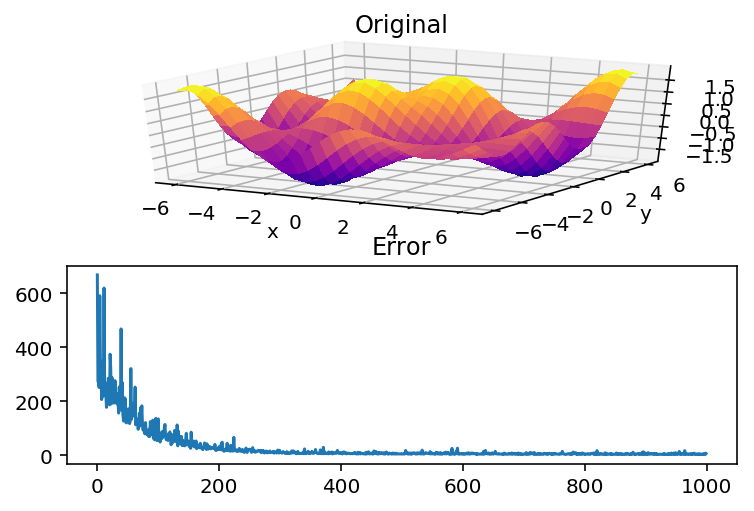

In [9]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1, projection='3d')
surf = ax1.plot_surface(x,y,z, cmap = 'plasma',
                       linewidth=0, antialiased=False)
ax1.set_title('Original')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('Original');

ax2 = fig.add_subplot(2,1,2)
ax2.plot(error)
ax2.set_title('Error')